In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
data_root = './data'

transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform)

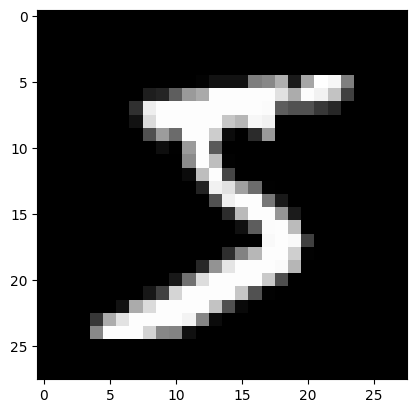

In [3]:
image, label = mnist[0]
plt.imshow(image[0].reshape(28,28), cmap='gray')

<class 'torch.Tensor'>


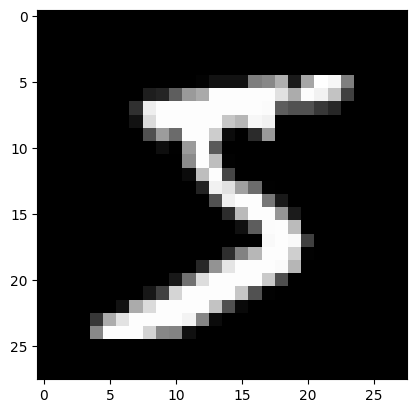

In [4]:
forward_image = image[0].reshape(28,28)
print(type(forward_image))
plt.imshow(forward_image, cmap='gray')

In [5]:
terminal_step = 50

beta, _ = torch.sort(torch.FloatTensor(1, terminal_step).uniform_(0, 0.1))

In [6]:
print(beta)
print(beta[0, 1])

tensor([[0.0013, 0.0029, 0.0064, 0.0081, 0.0084, 0.0089, 0.0140, 0.0145, 0.0161,
         0.0185, 0.0214, 0.0217, 0.0387, 0.0393, 0.0401, 0.0404, 0.0411, 0.0419,
         0.0432, 0.0472, 0.0474, 0.0475, 0.0479, 0.0486, 0.0487, 0.0509, 0.0547,
         0.0558, 0.0591, 0.0602, 0.0606, 0.0644, 0.0658, 0.0678, 0.0729, 0.0764,
         0.0767, 0.0772, 0.0775, 0.0814, 0.0845, 0.0890, 0.0894, 0.0906, 0.0924,
         0.0929, 0.0958, 0.0978, 0.0980, 0.0993]])
tensor(0.0029)


In [7]:
def cal_alpha(beta, step):
    result = torch.tensor(1).float()
    
    for i in range(0, step+1):
        tmp = beta[0, i]
        result *= (1-tmp)

    return result

In [8]:
print(cal_alpha(beta, 0))


tensor(0.9987)


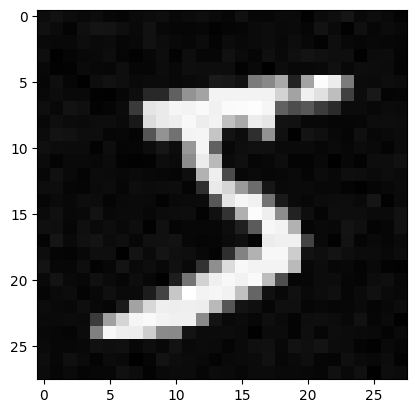

In [9]:
noise_t = torch.randn(28,28)
alpha_t = cal_alpha(beta, 5)

# forward 과정
z_t = forward_image * torch.sqrt(alpha_t) + noise_t * (1-torch.sqrt(alpha_t))

plt.imshow(z_t, cmap='gray')

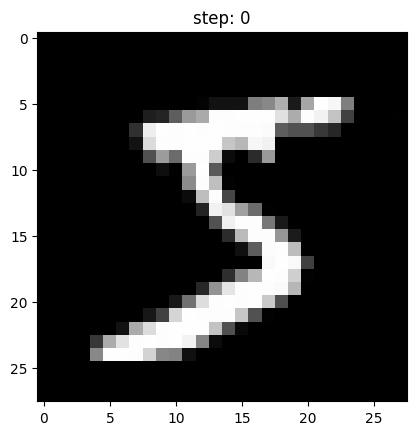

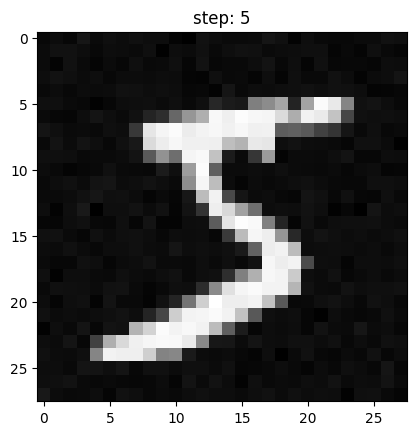

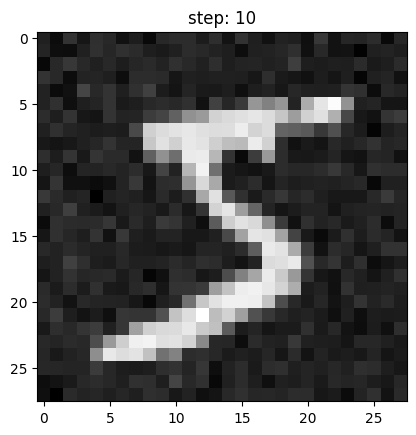

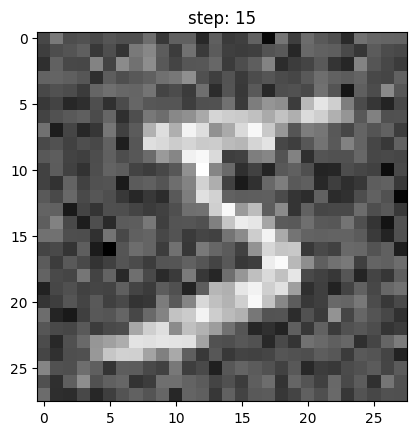

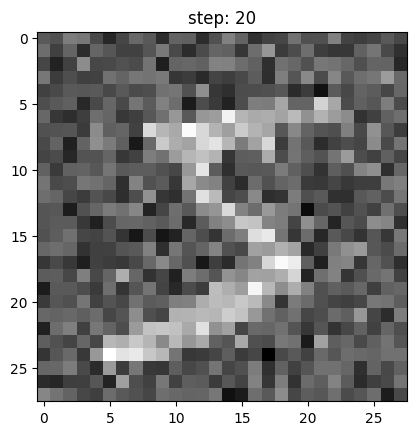

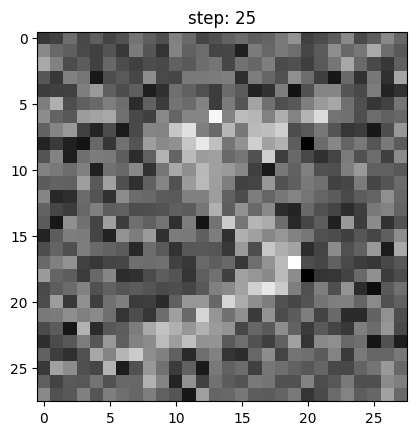

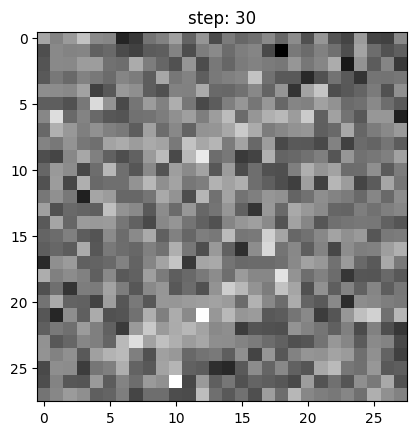

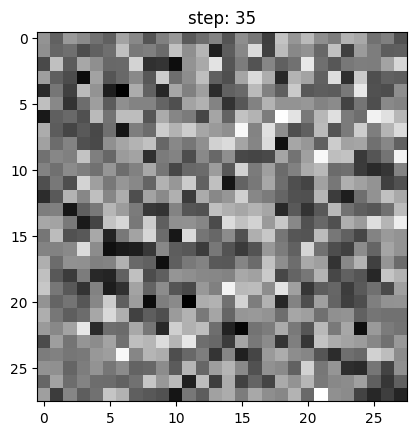

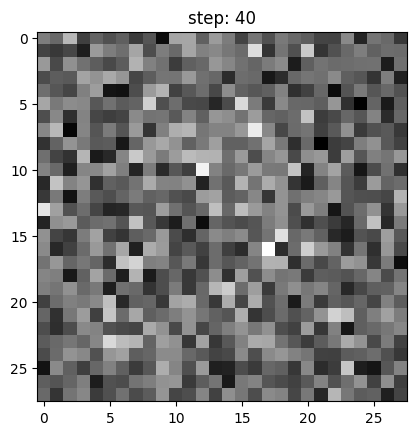

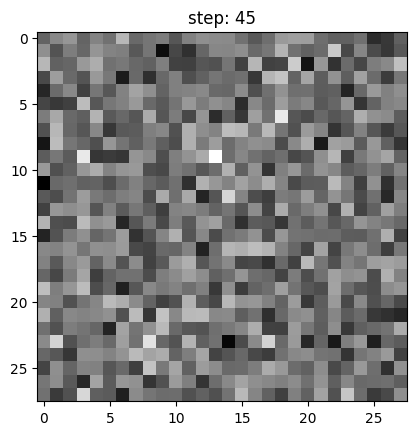

In [10]:
# 점진적 forward 과정

for t in range(0, terminal_step, 5):
    noise_t = torch.randn(28,28)
    alpha_t = cal_alpha(beta, t)

    # forward 과정
    z_t = forward_image * torch.sqrt(alpha_t) + noise_t * (1-torch.sqrt(alpha_t))
    plt.figure()
    plt.title(f"step: {t}")
    plt.imshow(z_t, cmap='gray')